In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to BanglaLekha-Isolated
source_dir = "/kaggle/input/bangla-lekha-isolated-dataset/BanglaLekha-Isolated/Images"
output_base = "/kaggle/working/banglalekha_letters_split"

# Only English labels
bangla_letters_english = [
    "aw", "aa", "i", "ii", "u", "uu", "ri", "e", "oi", "o",
    "ou", "ko", "kho", "go", "gho", "ngo", "cho", "chho", "jo", "jho",
    "nho", "to", "tho", "do", "dho", "nno", "to2", "tho2", "do2", "dho2",
    "no", "po", "pho", "bo", "bho", "mo", "zo", "ro", "lo", "sho",
    "sho2", "so", "ho", "rro", "rrho", "y", "t", "ng", "hh", "n"
]

# Make sure the output folders exist
splits = ["train", "val", "test"]
for split in splits:
    os.makedirs(os.path.join(output_base, split), exist_ok=True)

# Get first 50 class folders (you said these are alphabets)
all_classes = sorted(os.listdir(source_dir))[:50]

for idx, class_folder in enumerate(all_classes):
    class_path = os.path.join(source_dir, class_folder)
    if not os.path.isdir(class_path):
        continue

    eng_label = bangla_letters_english[idx]
    new_label = f"{idx:02d}_{eng_label}"

    # Get all images
    all_imgs = [f for f in os.listdir(class_path) if f.endswith(".png") or f.endswith(".jpg")]
    train_imgs, temp_imgs = train_test_split(all_imgs, test_size=0.3, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

    for split, split_imgs in zip(splits, [train_imgs, val_imgs, test_imgs]):
        out_dir = os.path.join(output_base, split, new_label)
        os.makedirs(out_dir, exist_ok=True)
        for img in split_imgs:
            src = os.path.join(class_path, img)
            dst = os.path.join(out_dir, img)
            shutil.copy(src, dst)

print("✅ Done splitting first 50 classes with English utterance labels.")

✅ Done splitting first 50 classes with English utterance labels.


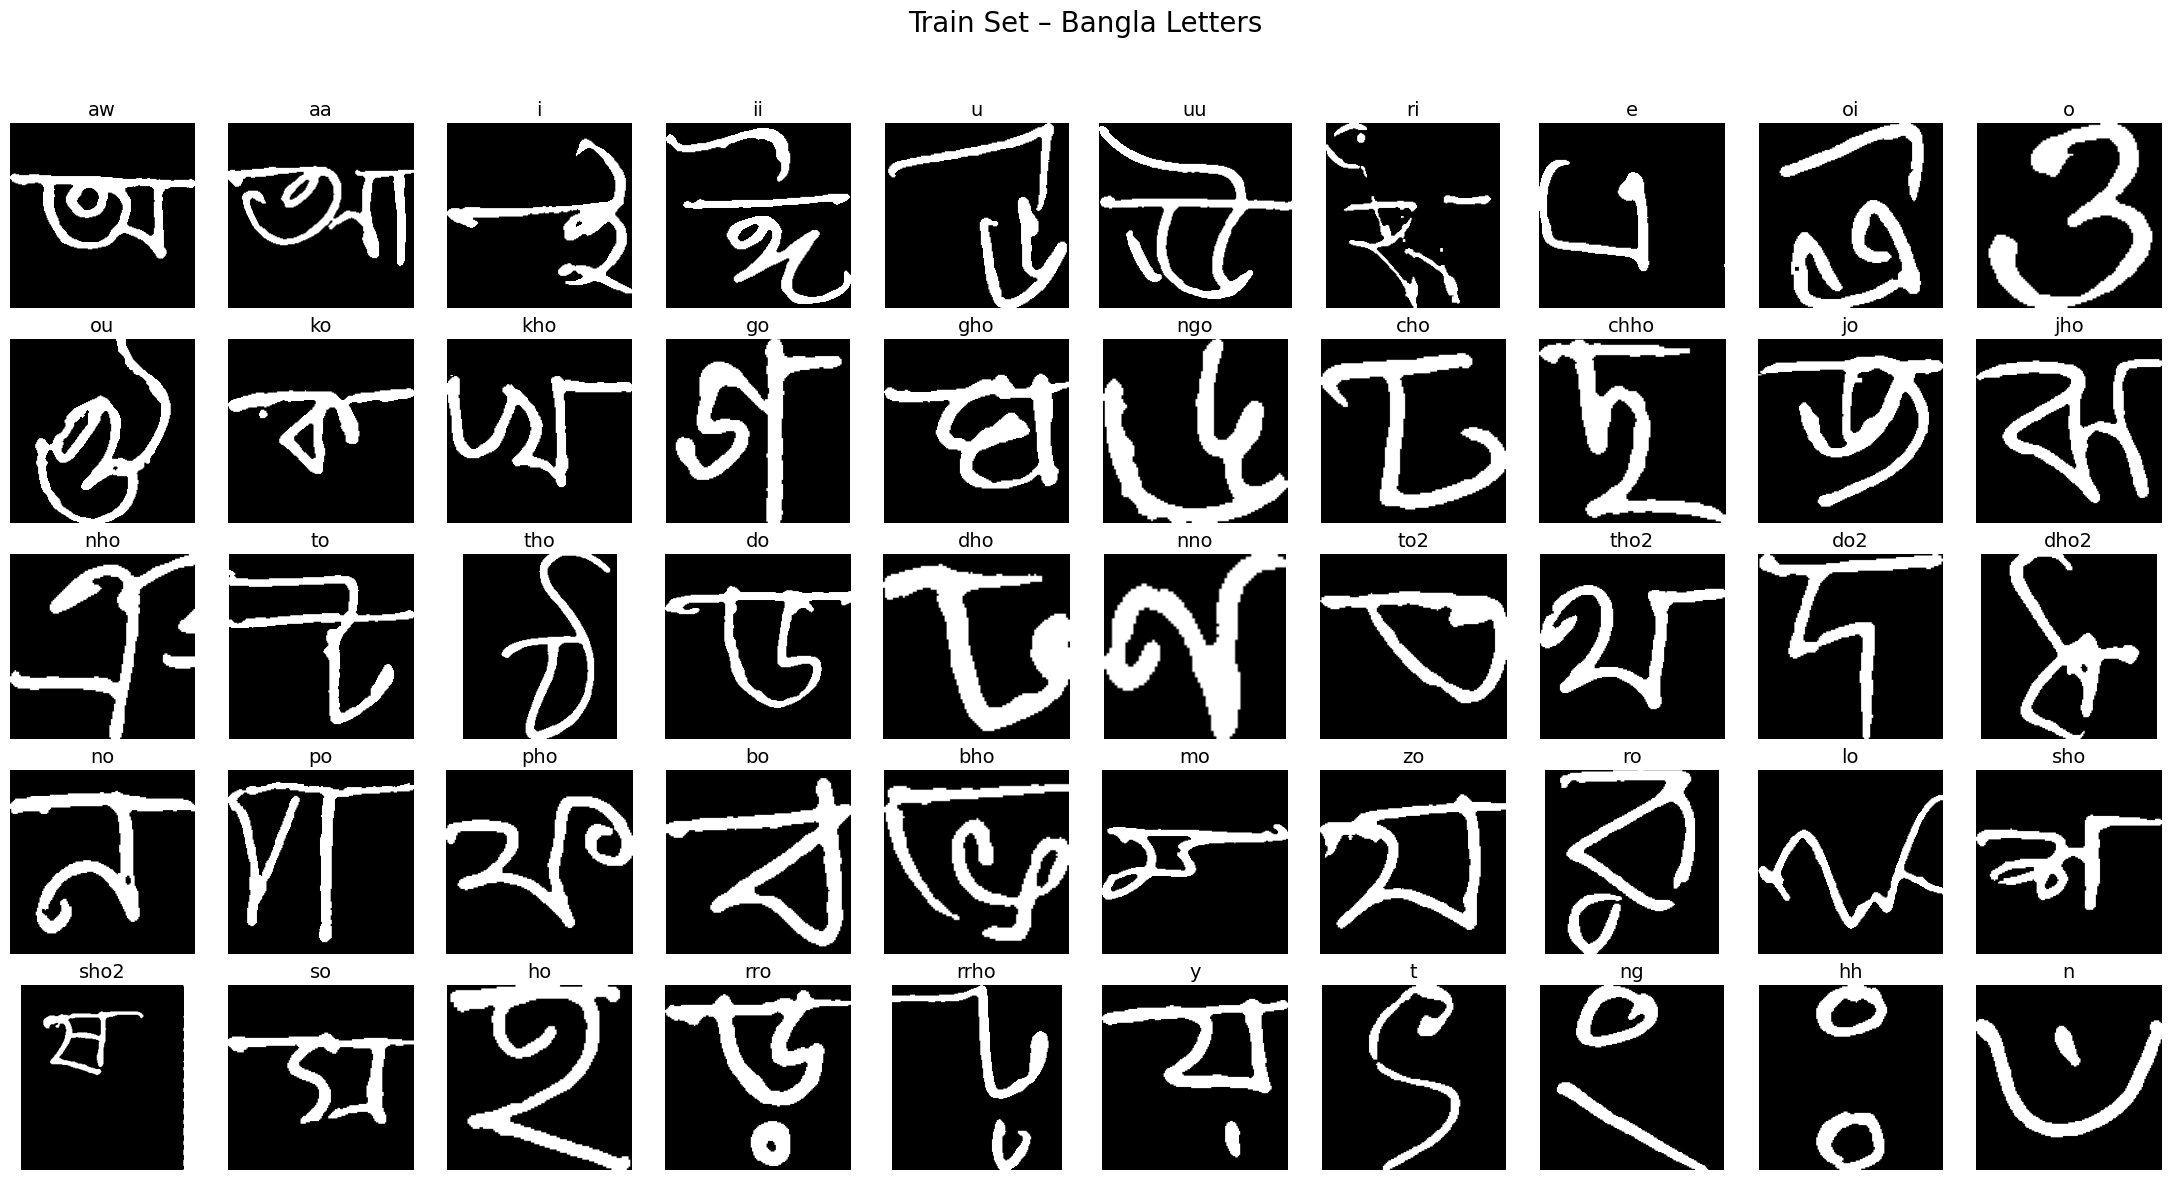

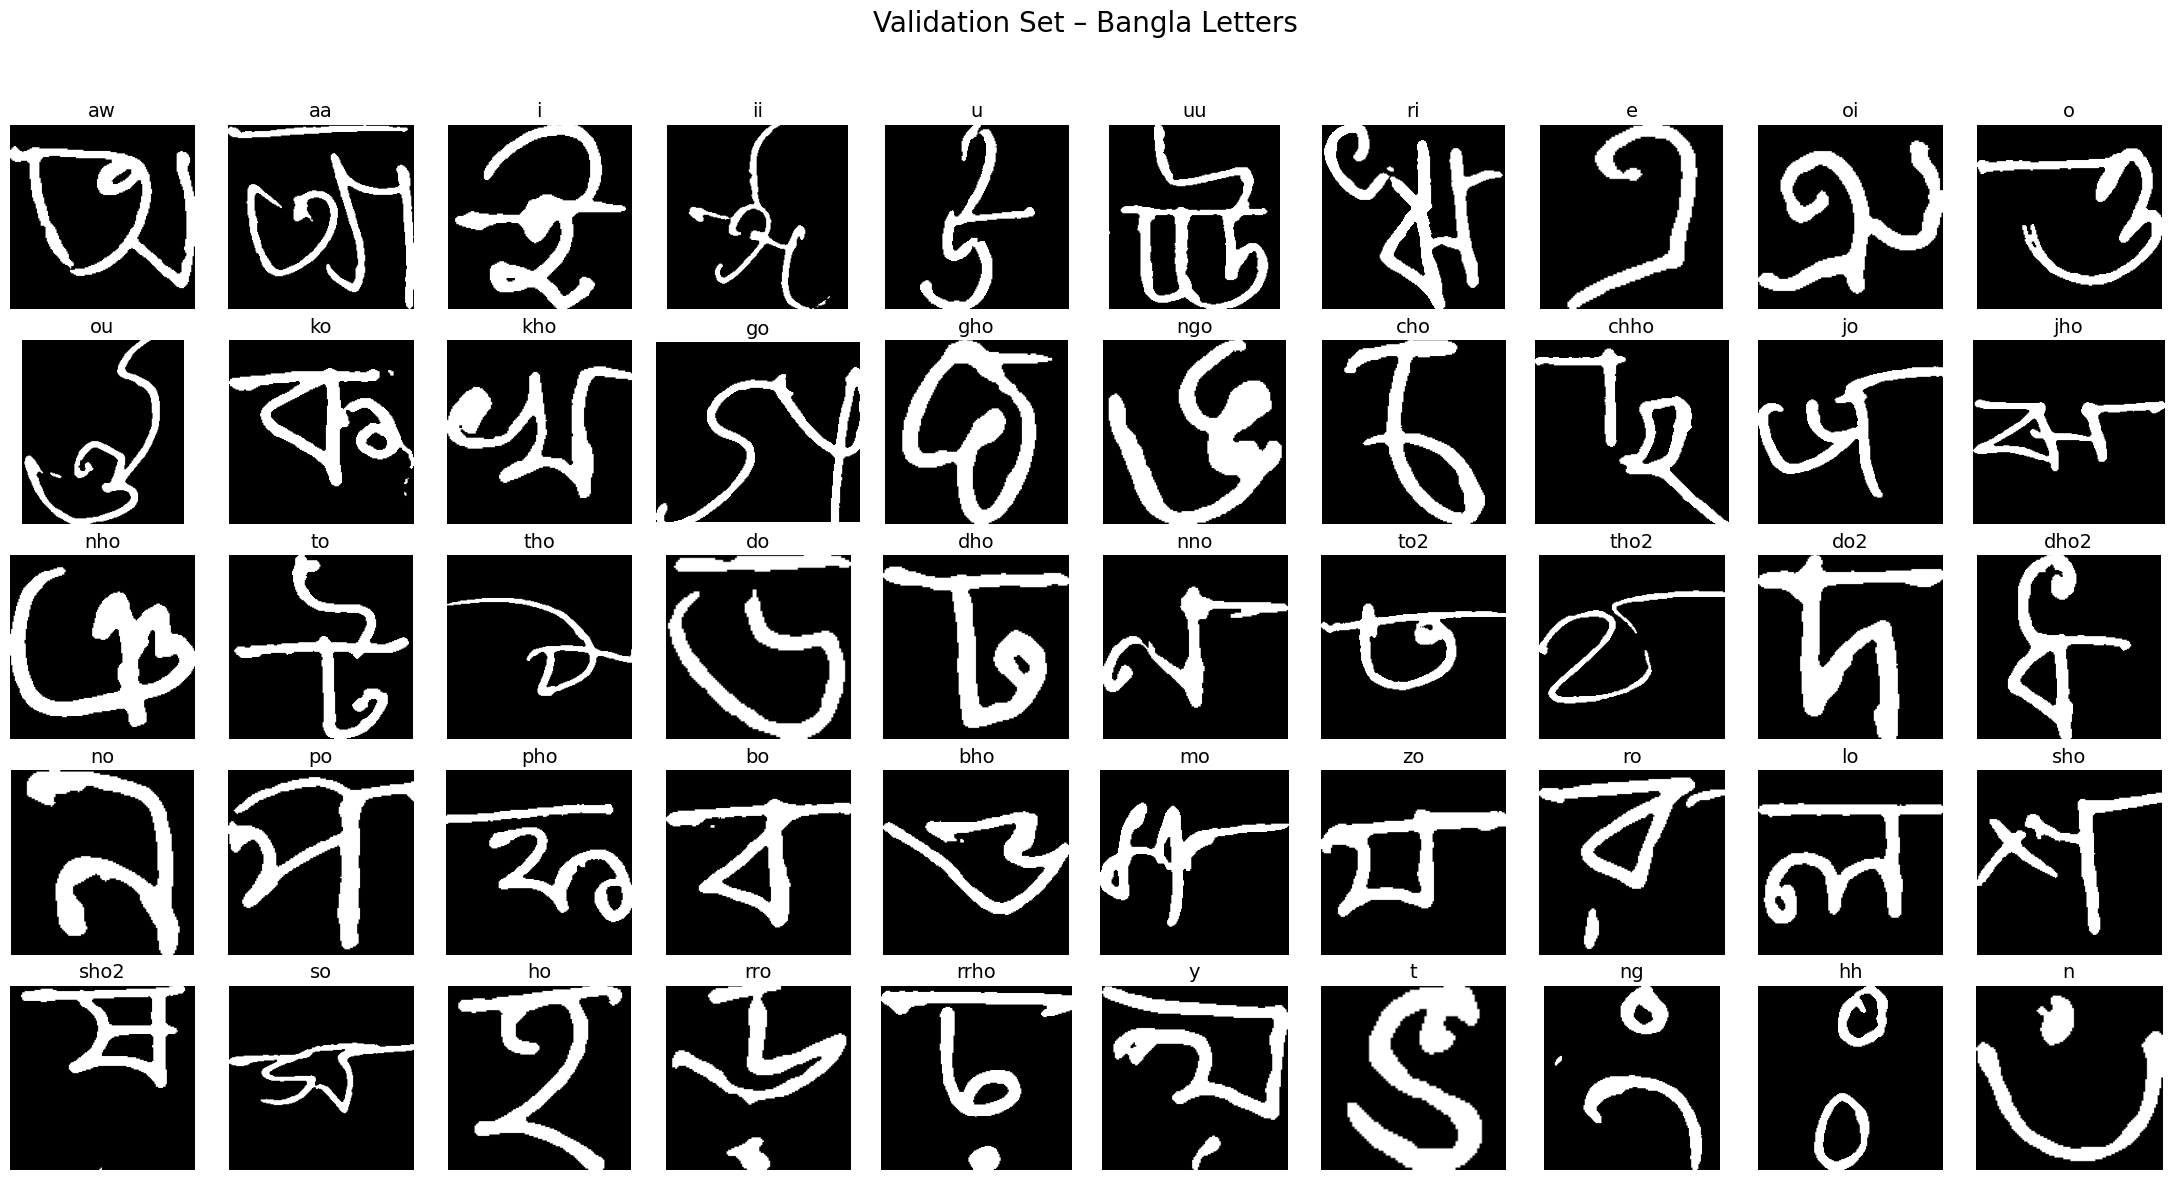

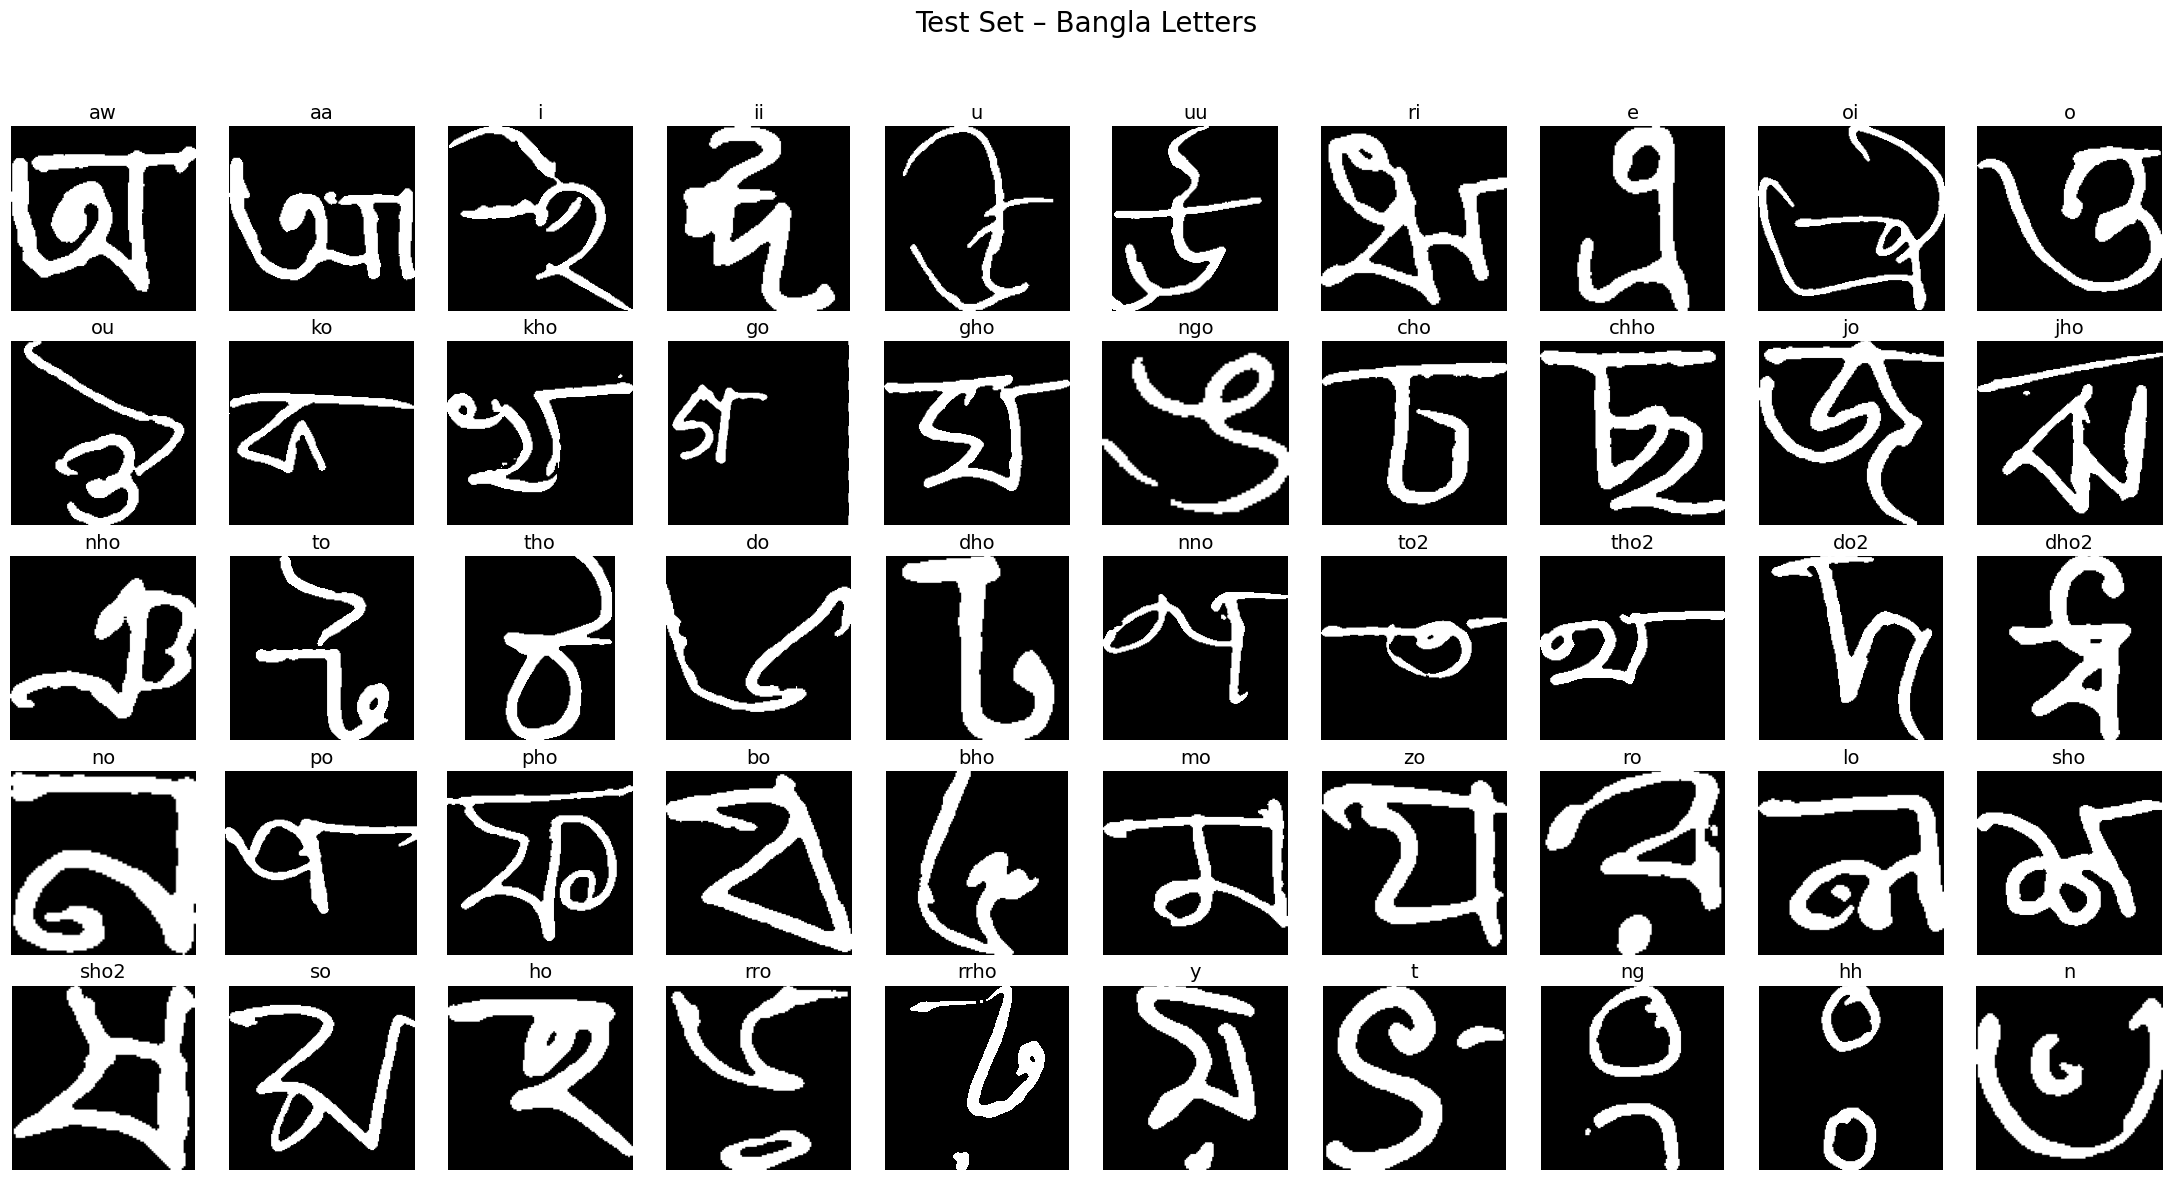

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_bangla_letters_english_label(folder, title="Bangla Letters – Sample Images", num_classes=50):
    plt.figure(figsize=(22, 12))
    shown = 0

    # Sort folders numerically by prefix, e.g. "00_aw_অ"
    class_folders = sorted(os.listdir(folder), key=lambda x: int(x.split('_')[0]))

    for idx, class_name in enumerate(class_folders[:num_classes]):
        class_path = os.path.join(folder, class_name)
        image_files = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg'))]
        if not image_files:
            continue

        img_path = os.path.join(class_path, image_files[0])
        img = mpimg.imread(img_path)

        # Parse folder name: "00_aw_অ"
        parts = class_name.split('_')
        eng_label = parts[1]

        plt.subplot(5, 10, idx + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{eng_label}", fontsize=14)
        plt.axis('off')
        shown += 1

    plt.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Paths for your splits
output_base = "/kaggle/working/banglalekha_letters_split"

# Visualize train, validation, test sets
visualize_bangla_letters_english_label(os.path.join(output_base, 'train'), "Train Set – Bangla Letters")
visualize_bangla_letters_english_label(os.path.join(output_base, 'val'), "Validation Set – Bangla Letters")
visualize_bangla_letters_english_label(os.path.join(output_base, 'test'), "Test Set – Bangla Letters")

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ---------------------------------------------
# Step 2.2: Load Data with ImageDataGenerator
# ---------------------------------------------
image_size = (32, 32)
input_shape = (32, 32, 1)
batch_size = 64
epochs = 60
num_classes = 50  # Update if using fewer classes


# Paths after splitting
train_path = "/kaggle/working/banglalekha_letters_split/train"
val_path   = "/kaggle/working/banglalekha_letters_split/val"
test_path  = "/kaggle/working/banglalekha_letters_split/test"

# Augmented training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=8,           # Slightly more rotation
    zoom_range=0.10,            # Increased zoom variation
    width_shift_range=0.08,     # Allow more width shifting
    height_shift_range=0.08,    # Allow more height shifting
    shear_range=0.10,           # Stronger shearing
    brightness_range=(0.8, 1.2),# Add brightness variation
    fill_mode='nearest'
)

# No augmentation for validation/test
val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    color_mode='grayscale',
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=True,
    seed=42
)

val_generator = val_test_datagen.flow_from_directory(
    val_path,
    target_size=image_size,
    color_mode='grayscale',
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=False,
    seed=42
)

test_generator = val_test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    color_mode='grayscale',
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=False,
    seed=42
)

2025-06-13 14:09:13.563630: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749823754.151727      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749823754.296615      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 69244 images belonging to 50 classes.
Found 14839 images belonging to 50 classes.
Found 14867 images belonging to 50 classes.


In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, BatchNormalization,
                                     Activation, Dropout, Flatten, Dense)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# ----------------------------
# 1. Model Architecture: ScriptNet
# ----------------------------
def build_scriptnet(input_shape=(32, 32, 1), num_classes=50):
    inputs = Input(shape=input_shape, name='input_layer')

    x = Conv2D(64, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Flatten()(x)
    x = Dense(512)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax', name='output_layer')(x)

    model = Model(inputs=inputs, outputs=outputs, name='ScriptNet')
    return model

In [6]:
# ----------------------------
# 3. Compile Model
# ----------------------------
model = build_scriptnet(input_shape=input_shape, num_classes=num_classes)
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

I0000 00:00:1749823777.152667      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1749823777.153410      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "ScriptNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,496,818 (9.52 MB)

 Trainable params: 2,494,898 (9.52 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [7]:
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=8, min_delta=0.001, restore_best_weights=True),
    ModelCheckpoint("best_scriptnet_bangla50letters.h5", monitor="val_accuracy", save_best_only=True, verbose=1)
]


In [8]:
# ----------------------------
# 5. Train Model
# ----------------------------
steps_per_epoch = np.ceil(train_generator.samples / batch_size).astype(int)
validation_steps = np.ceil(val_generator.samples / batch_size).astype(int)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1749823784.045100     120 service.cc:148] XLA service 0x7eeb6000a2e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749823784.046954     120 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1749823784.046983     120 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1749823784.657591     120 cuda_dnn.cc:529] Loaded cuDNN version 90300


   5/1082 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - accuracy: 0.0384 - loss: 4.5233

I0000 00:00:1749823791.669156     120 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1082/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4621 - loss: 2.0204
Epoch 1: val_accuracy improved from -inf to 0.86434, saving model to best_scriptnet_bangla50letters.h5
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 76s 59ms/step - accuracy: 0.4623 - loss: 2.0199 - val_accuracy: 0.8643 - val_loss: 0.4754 - learning_rate: 0.0010
Epoch 2/60
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7727 - loss: 0.7734
Epoch 2: val_accuracy improved from 0.86434 to 0.89480, saving model to best_scriptnet_bangla50letters.h5
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 57s 52ms/step - accuracy: 0.7727 - loss: 0.7734 - val_accuracy: 0.8948 - val_loss: 0.3738 - learning_rate: 0.0010
Epoch 3/60
1081/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8182 - loss: 0.6141
Epoch 3: val_accuracy improved from 0.89480 to 0.89858, saving model to best_scriptnet_bangla50letters.h5
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 57s 52ms/step - accuracy: 0.8182 - loss: 0.6141 - val_accuracy: 0.8986 - val_loss: 0.3681 - learning_rate: 0

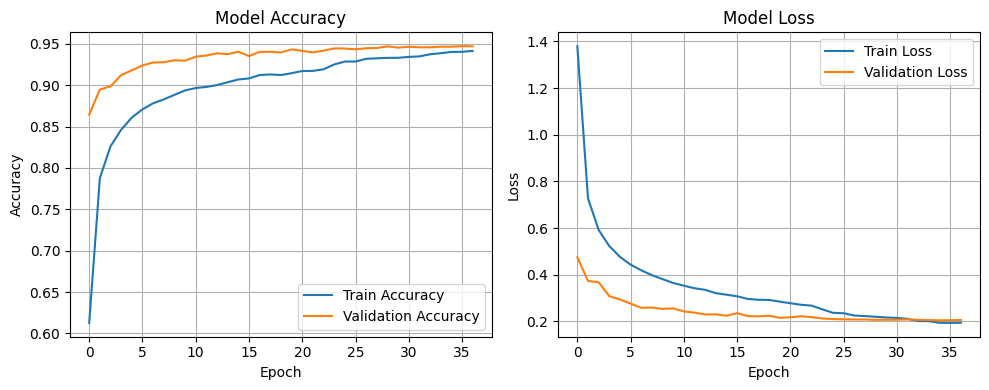

In [9]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

233/233 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step


✅ Confusion matrix saved to: confusion_matrix.png
📋 Classification Report:

              precision    recall  f1-score   support

       00_aw     0.9508    0.9764    0.9635       297
       01_aa     0.9603    0.9764    0.9683       297
        02_i     0.9664    0.9697    0.9681       297
       03_ii     0.9864    0.9765    0.9815       298
        04_u     0.9199    0.9631    0.9410       298
       05_uu     0.9694    0.9564    0.9628       298
       06_ri     0.9588    0.9426    0.9506       296
        07_e     0.9697    0.9664    0.9681       298
       08_oi     0.9595    0.9530    0.9562       298
        09_o     0.9604    0.9765    0.9684       298
       10_ou     0.9497    0.9497    0.9497       298
       11_ko     0.9535    0.9631    0.9583       298
      12_kho     0.9222    0.8412    0.8799       296
       13_go     0.9631    0.9631    0.9631       298
      14_gho     0.8636    0.8956    0.8793       297
      15_ngo     0.9545    0.9192    0.9365       297
     

/tmp/ipykernel_35/385099705.py:92: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', end - start)


✅ ROC group saved to: roc_curves_page1.png


<Figure size 640x480 with 0 Axes>

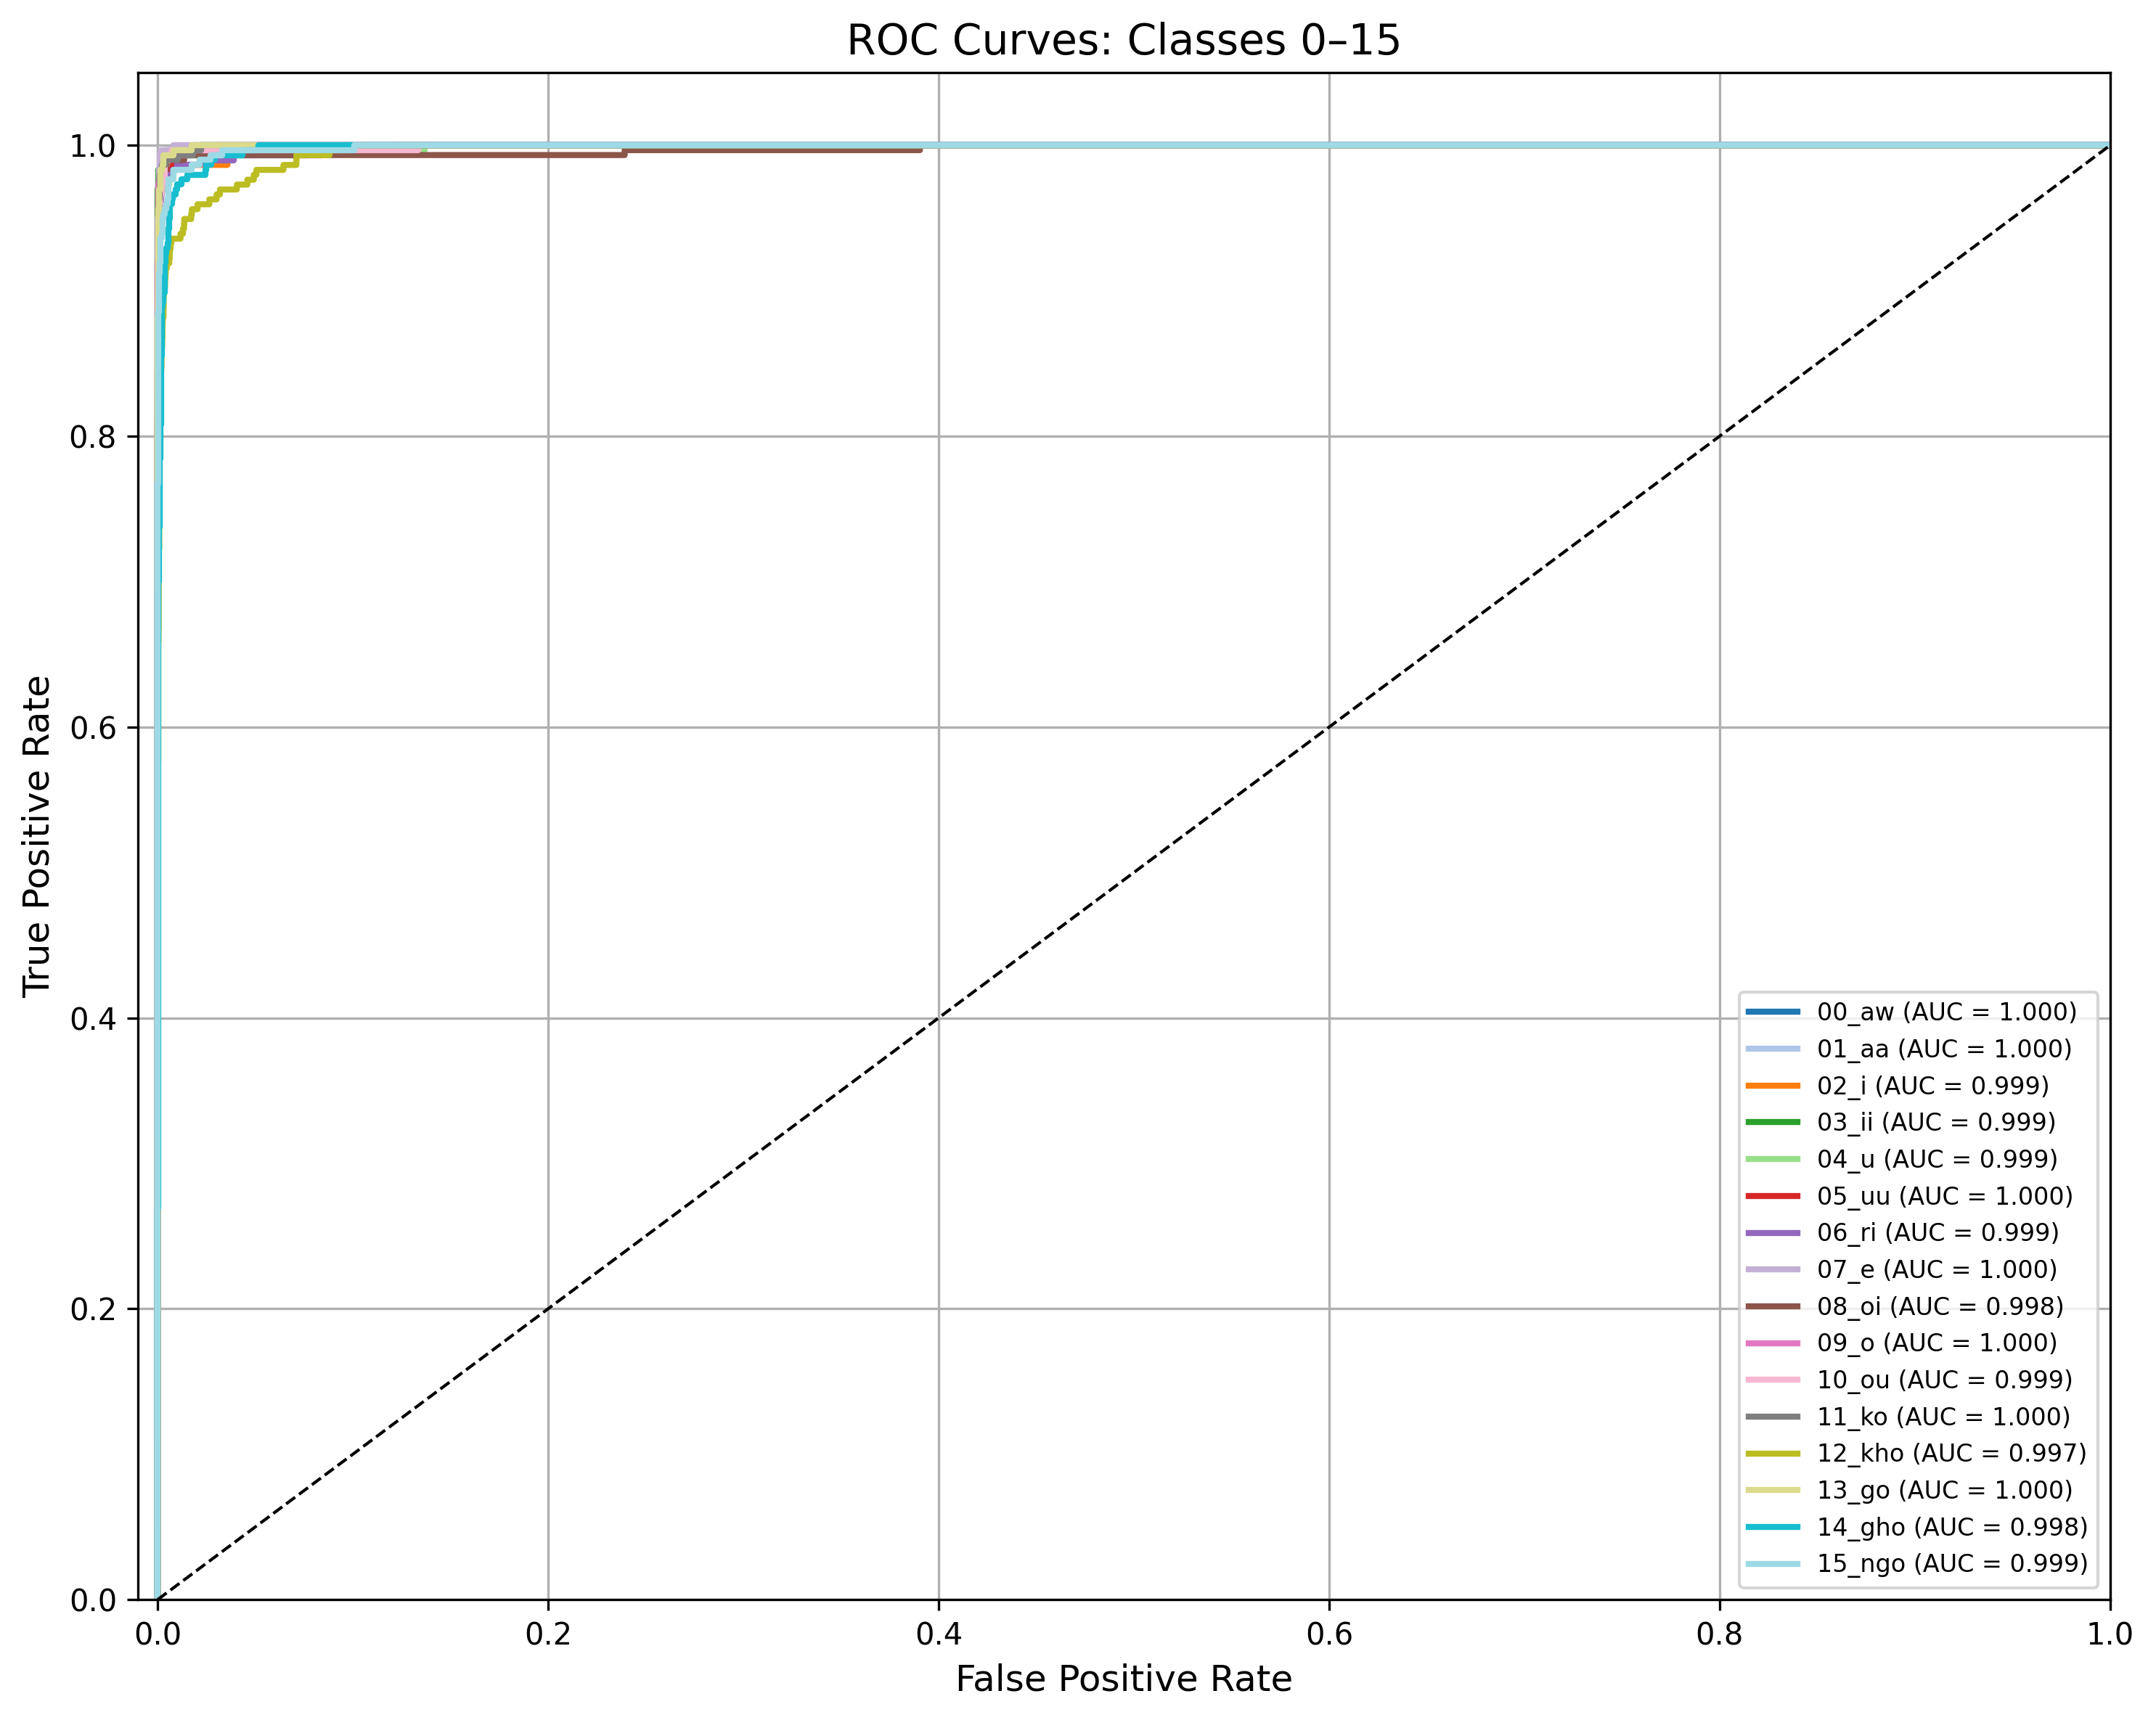

/tmp/ipykernel_35/385099705.py:92: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', end - start)


✅ ROC group saved to: roc_curves_page2.png


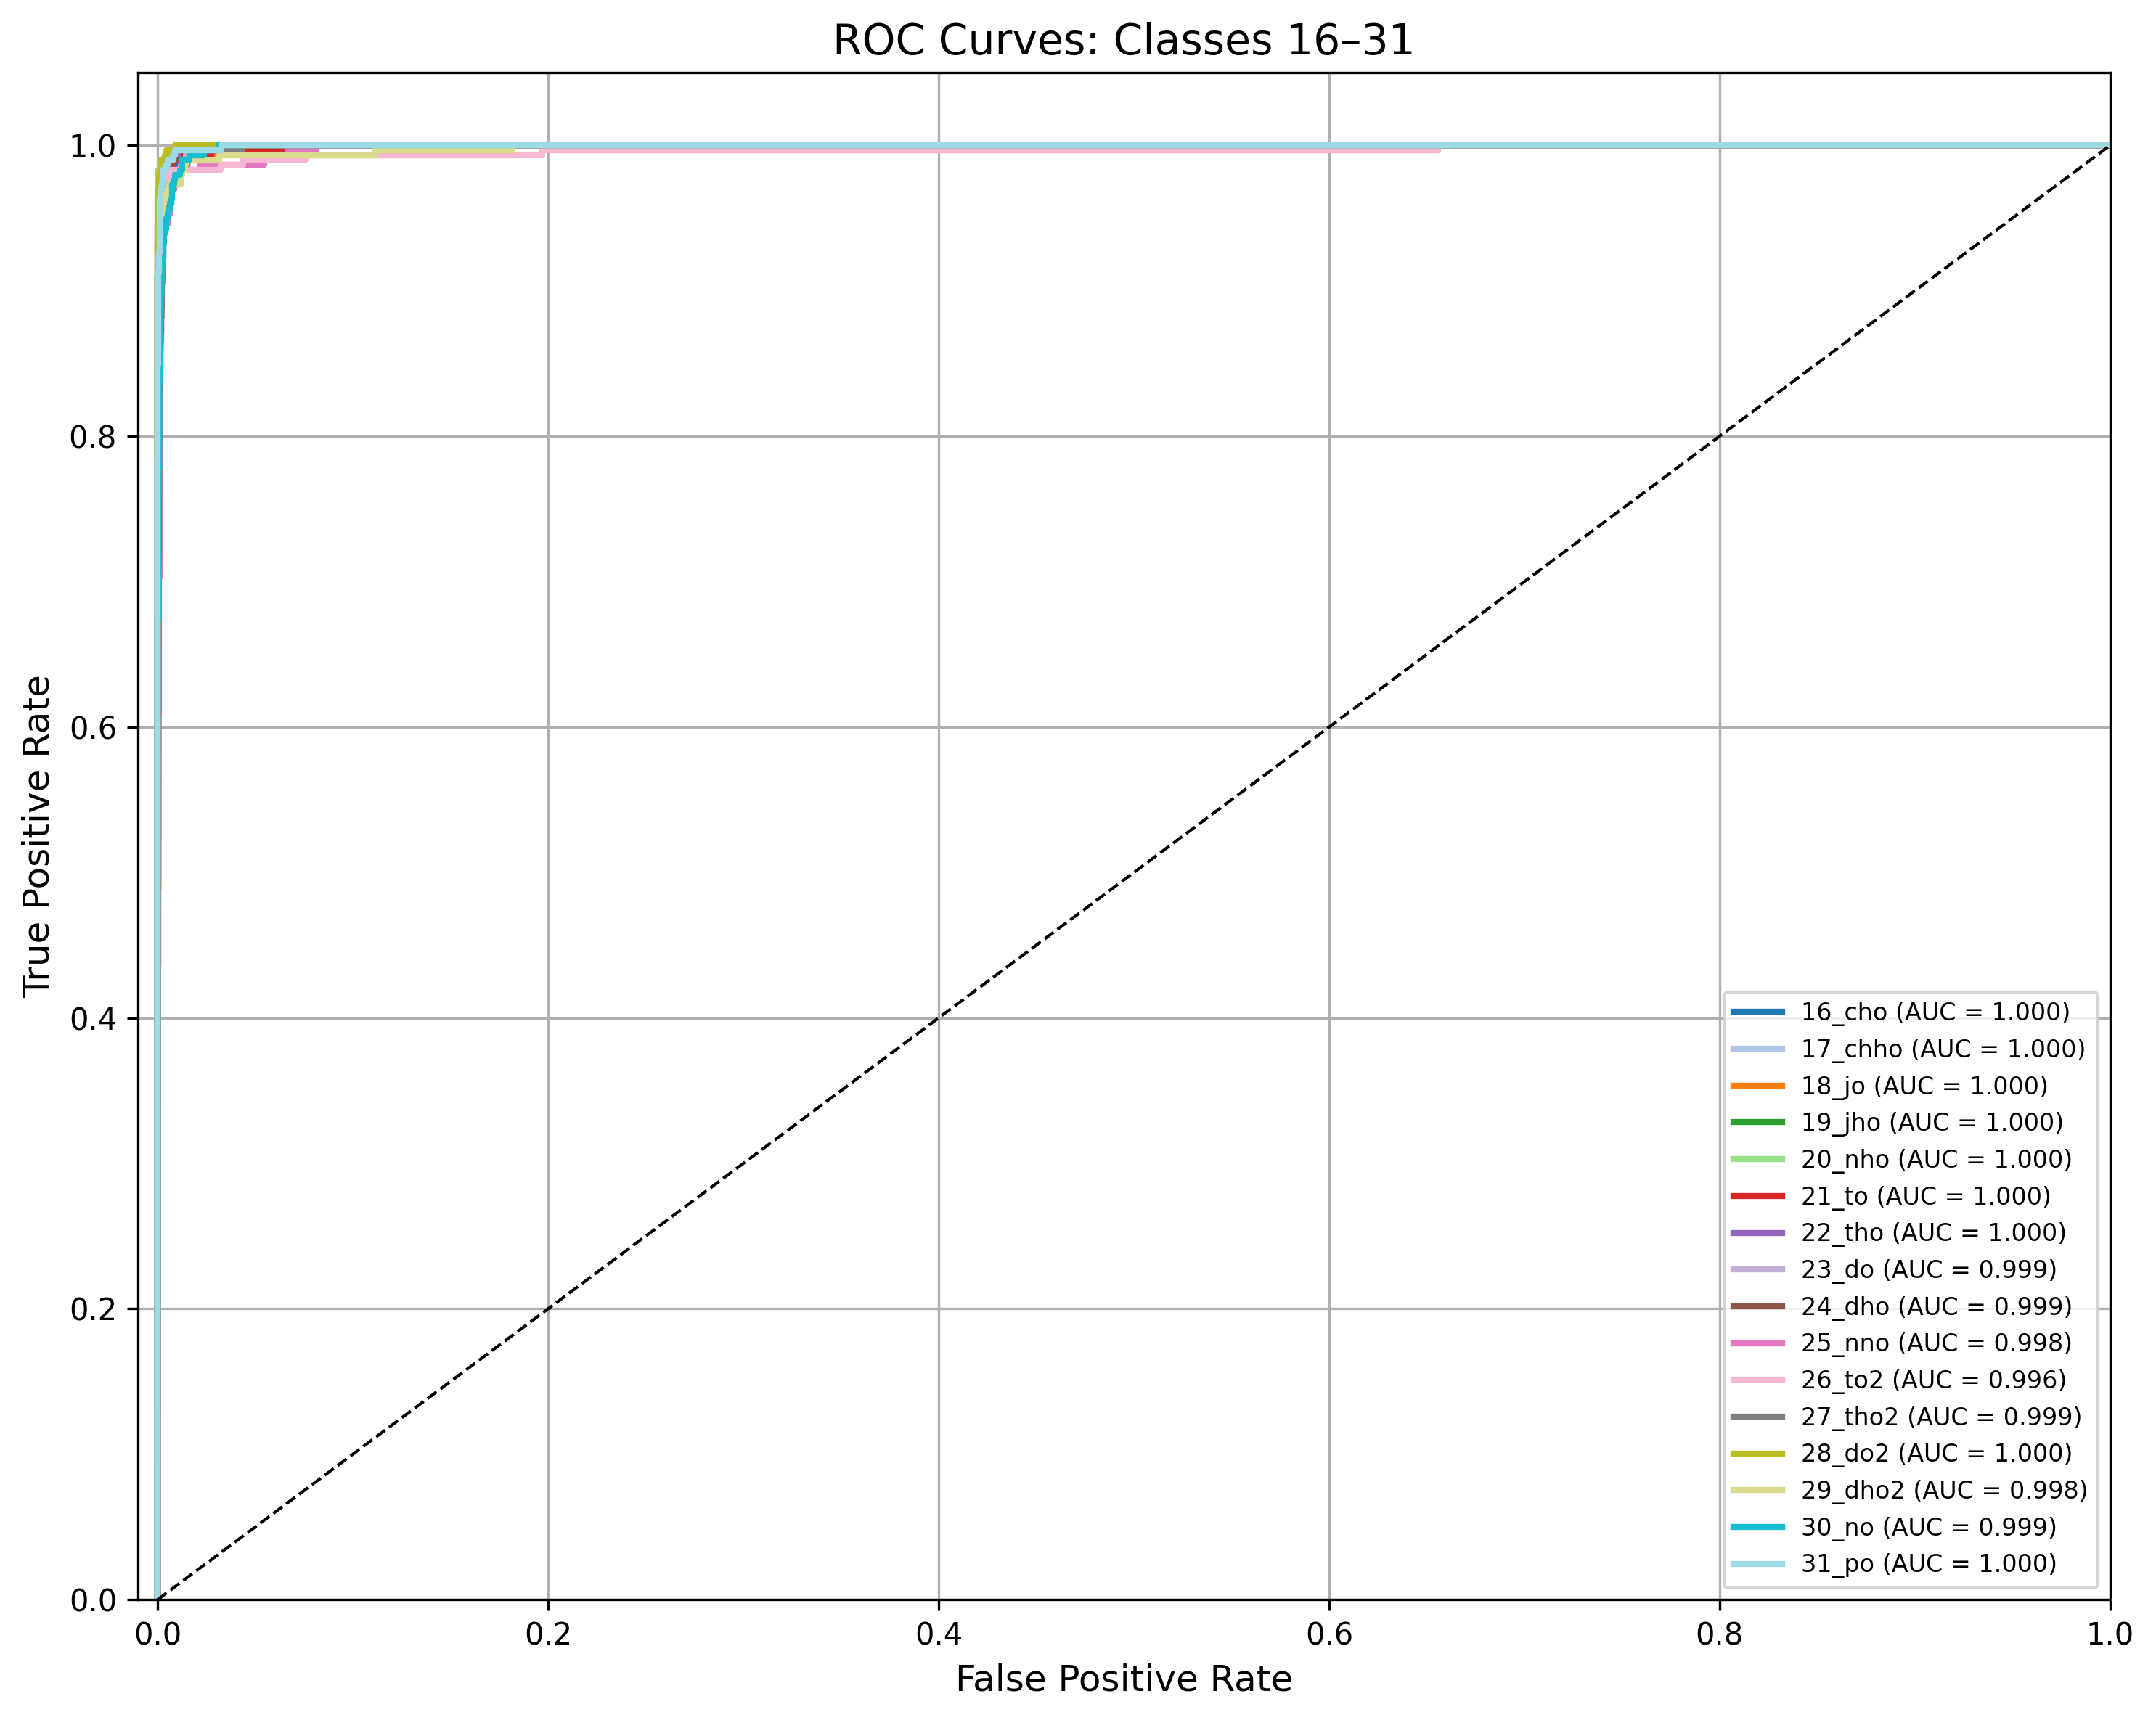

/tmp/ipykernel_35/385099705.py:92: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', end - start)


✅ ROC group saved to: roc_curves_page3.png


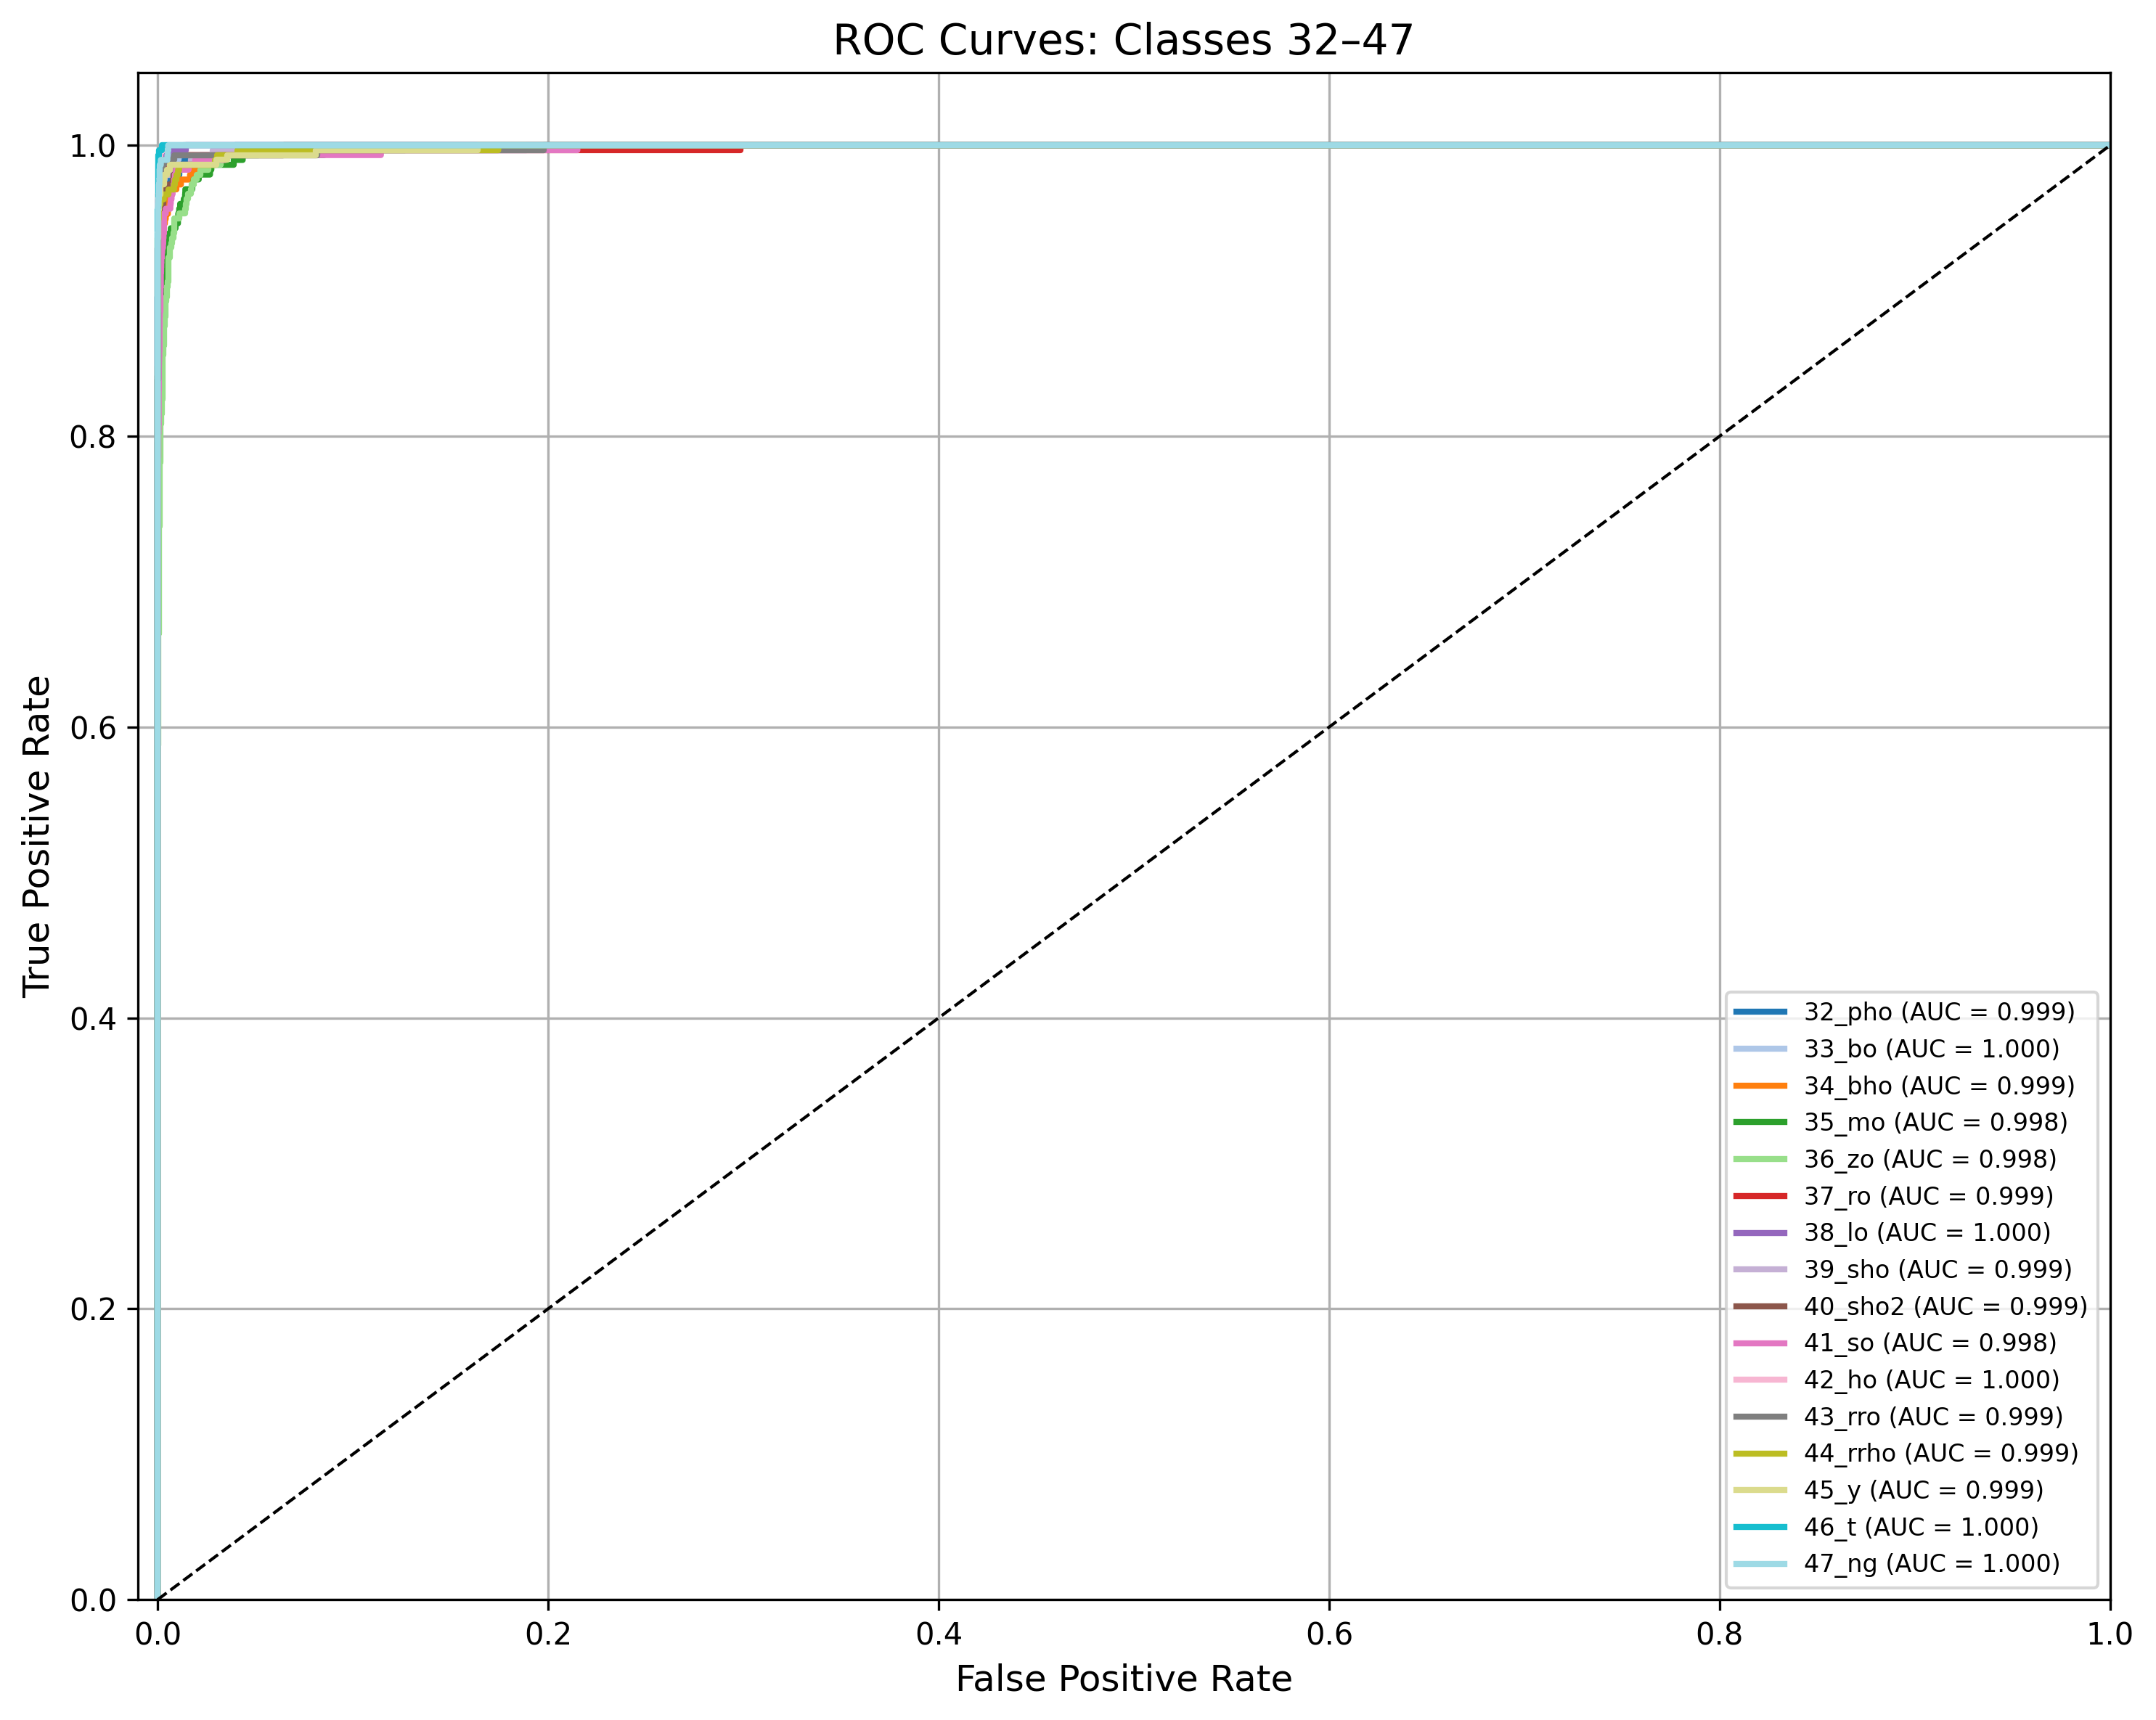

/tmp/ipykernel_35/385099705.py:92: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', end - start)


✅ ROC group saved to: roc_curves_page4.png


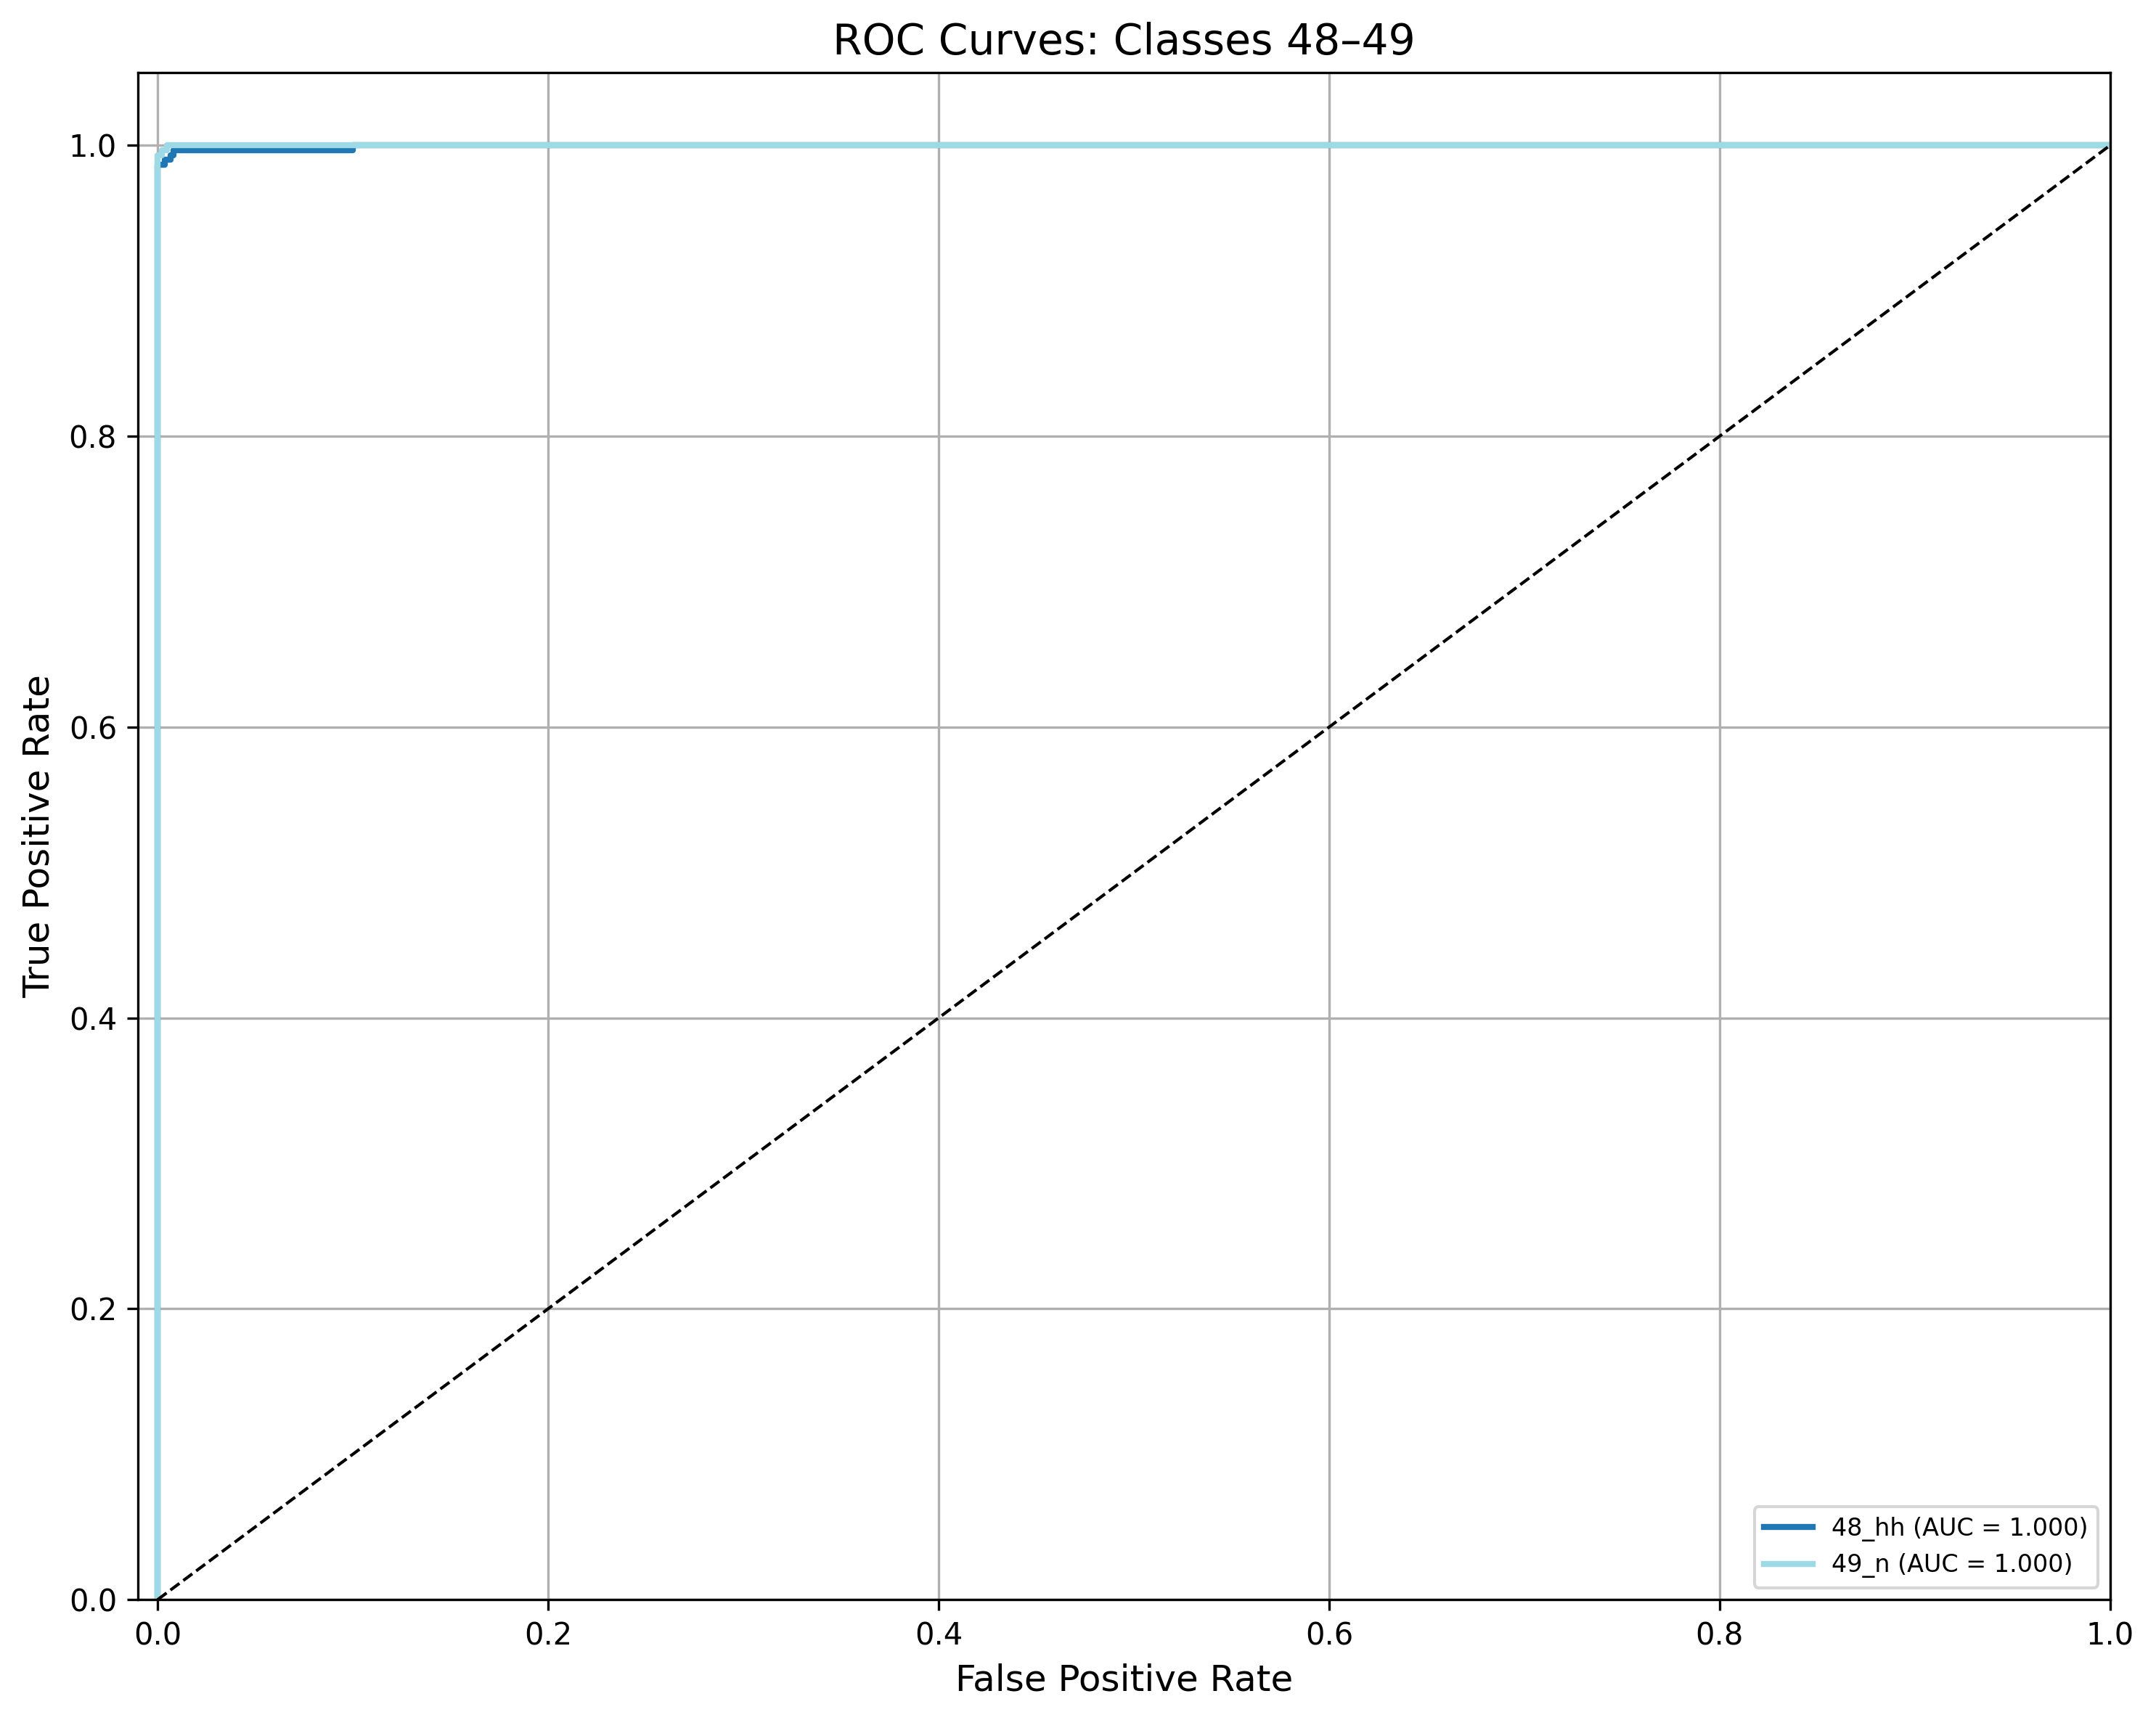

✅ Classification metrics saved to: metrics.csv


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, classification_report, precision_score,
    recall_score, f1_score, roc_auc_score, roc_curve, auc
)
import pandas as pd
from sklearn.preprocessing import label_binarize
from math import ceil

def plot_confusion_matrix_general(
    y_true, y_pred, class_labels,
    title="Confusion Matrix",
    normalize=False,
    cmap='Blues',
    dpi=150,
    show_grid=False
):
    num_classes = len(class_labels)
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    cell_scale = 0.5
    fig_width = min(25, max(10, num_classes * cell_scale))
    fig_height = min(25, max(10, num_classes * cell_scale))

    fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=dpi)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046 * fig_height / fig_width, pad=0.04)
    cbar.ax.tick_params(labelsize=10)

    ax.set(
        xticks=np.arange(num_classes),
        yticks=np.arange(num_classes),
        xticklabels=class_labels,
        yticklabels=class_labels,
        xlabel='Predicted Label',
        ylabel='True Label',
        title=title
    )

    tick_font = max(7, 14 - num_classes // 10)
    rotation_angle = 45 if num_classes > 10 else 0
    plt.setp(ax.get_xticklabels(), rotation=rotation_angle, ha="right", fontsize=tick_font)
    plt.setp(ax.get_yticklabels(), fontsize=tick_font)

    if show_grid:
        ax.set_xticks(np.arange(num_classes + 1) - 0.5, minor=True)
        ax.set_yticks(np.arange(num_classes + 1) - 0.5, minor=True)
        ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
        ax.tick_params(which="minor", bottom=False, left=False)
    else:
        ax.grid(False)
        ax.tick_params(which="minor", bottom=False, left=False)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    annotation_font = max(6, 13 - num_classes // 10)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            val = format(cm[i, j], fmt)
            ax.text(j, i, val,
                    ha="center", va="center",
                    fontsize=annotation_font,
                    color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

def plot_roc_curves(y_true, y_pred_probs, class_names, dpi=150, group_size=16, export_base_path=None):
    """
    Plot ROC curves for each class in manageable groups.

    Parameters:
    - y_true: Ground truth labels (integers)
    - y_pred_probs: Predicted probabilities (num_samples x num_classes)
    - class_names: List of class names
    - dpi: DPI for the figures
    - group_size: How many ROC curves per page
    - export_base_path: If given, saves each plot page to base_path_pageX.png
    """
    num_classes = len(class_names)
    y_true_bin = label_binarize(y_true, classes=range(num_classes))
    total_groups = ceil(num_classes / group_size)

    for group_idx in range(total_groups):
        start = group_idx * group_size
        end = min((group_idx + 1) * group_size, num_classes)

        plt.figure(figsize=(10, 8), dpi=dpi)
        colors = plt.cm.get_cmap('tab20', end - start)

        for i, class_i in enumerate(range(start, end)):
            if len(np.unique(y_true_bin[:, class_i])) > 1:
                fpr, tpr, _ = roc_curve(y_true_bin[:, class_i], y_pred_probs[:, class_i])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, color=colors(i), lw=2,
                         label=f"{class_names[class_i]} (AUC = {roc_auc:.3f})")
            else:
                print(f"Skipping ROC for class '{class_names[class_i]}' (no positives).")

        plt.plot([0, 1], [0, 1], 'k--', lw=1)
        plt.xlim([-0.01, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title(f'ROC Curves: Classes {start}–{end - 1}', fontsize=14)
        plt.legend(loc="lower right", fontsize=8)
        plt.grid(True)
        plt.tight_layout()

        if export_base_path:
            path = f"{export_base_path}_page{group_idx+1}.png"
            plt.savefig(path, dpi=dpi)
            print(f"✅ ROC group saved to: {path}")

        plt.show()

def evaluate_model(
    model, test_generator,
    threshold=0.5,
    plot_cm=True,
    normalize_cm=False,
    plot_roc=True,
    export_metrics_path=None,
    export_cm_path=None,
    export_roc_path=None
):
    """
    Generalized evaluation for multi-class classifier with metrics and visualization.
    """
    y_pred_probs = model.predict(test_generator)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = test_generator.classes
    class_names = list(test_generator.class_indices.keys())
    num_classes = len(class_names)

    # 1. Confusion Matrix
    if plot_cm:
        dpi_val = 300 if export_cm_path else 150
        plot_confusion_matrix_general(
            y_true, y_pred, class_labels=class_names,
            title="Confusion Matrix",
            normalize=normalize_cm,
            dpi=dpi_val
        )
        if export_cm_path:
            fig = plt.gcf()
            fig.savefig(export_cm_path, dpi=dpi_val)
            print(f"✅ Confusion matrix saved to: {export_cm_path}")

    # 2. Classification Report
    report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)
    print("📋 Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

    # 3. Precision/Recall/F1 Scores
    precision_macro = precision_score(y_true, y_pred, average='macro')
    recall_macro = recall_score(y_true, y_pred, average='macro')
    f1_macro = f1_score(y_true, y_pred, average='macro')

    precision_weighted = precision_score(y_true, y_pred, average='weighted')
    recall_weighted = recall_score(y_true, y_pred, average='weighted')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')

    precision_micro = precision_score(y_true, y_pred, average='micro')
    recall_micro = recall_score(y_true, y_pred, average='micro')
    f1_micro = f1_score(y_true, y_pred, average='micro')

    print(f"Macro Precision: {precision_macro:.4f}, Recall: {recall_macro:.4f}, F1: {f1_macro:.4f}")
    print(f"Weighted Precision: {precision_weighted:.4f}, Recall: {recall_weighted:.4f}, F1: {f1_weighted:.4f}")
    print(f"Micro Precision: {precision_micro:.4f}, Recall: {recall_micro:.4f}, F1: {f1_micro:.4f}")

    # 4. ROC Curves
    if plot_roc:
        if y_pred_probs.shape[1] == num_classes:
            plot_roc_curves(
                y_true=y_true,
                y_pred_probs=y_pred_probs,
                class_names=class_names,
                dpi=300 if export_roc_path else 150,
                group_size=16,
                export_base_path=export_roc_path.replace(".png", "") if export_roc_path else None
            )
        else:
            print("⚠️ ROC plotting skipped due to prediction shape mismatch.")

    # 5. Export CSV
    if export_metrics_path:
        metrics_df = pd.DataFrame(report).transpose()
        metrics_df.to_csv(export_metrics_path)
        print(f"✅ Classification metrics saved to: {export_metrics_path}")

    return {
        "classification_report_dict": report,
        "precision_macro": precision_macro,
        "recall_macro": recall_macro,
        "f1_macro": f1_macro,
        "precision_weighted": precision_weighted,
        "recall_weighted": recall_weighted,
        "f1_weighted": f1_weighted,
        "precision_micro": precision_micro,
        "recall_micro": recall_micro,
        "f1_micro": f1_micro
    }
results = evaluate_model(
    model,
    test_generator,
    threshold=0.5,
    plot_cm=True,
    normalize_cm=False,
    plot_roc=True,
    export_metrics_path="metrics.csv",
    export_cm_path="confusion_matrix.png",
    export_roc_path="roc_curves.png"  # Will create roc_curves_page1.png, page2, etc.
)


In [11]:
# ----------------------------
# 5. Train Model
# ----------------------------
steps_per_epoch = np.ceil(train_generator.samples / batch_size).astype(int)
validation_steps = np.ceil(val_generator.samples / batch_size).astype(int)

history2 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/60
1081/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9359 - loss: 0.2112
Epoch 1: val_accuracy did not improve from 0.94717
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 56s 52ms/step - accuracy: 0.9359 - loss: 0.2112 - val_accuracy: 0.9461 - val_loss: 0.2078 - learning_rate: 2.5000e-04
Epoch 2/60
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9387 - loss: 0.2003
Epoch 2: val_accuracy did not improve from 0.94717
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 56s 52ms/step - accuracy: 0.9387 - loss: 0.2003 - val_accuracy: 0.9458 - val_loss: 0.2052 - learning_rate: 2.5000e-04
Epoch 3/60
1081/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9373 - loss: 0.2066
Epoch 3: val_accuracy did not improve from 0.94717
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 56s 51ms/step - accuracy: 0.9373 - loss: 0.2066 - val_accuracy: 0.9466 - val_loss: 0.2075 - learning_rate: 2.5000e-04
Epoch 4/60
1081/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9384 - loss: 0.1978
Epoch 4: val_accuracy did not improve from 0